In [1]:
# Packages & Settings


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns


billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [6]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [7]:
# replacing artist names
# at some point I gotta figure out how to deal with "Janet Jackson" vs "Janet"

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [8]:
weekly_array_groupby = billboard_df.groupby('week_id').song_id.unique().reset_index()

In [9]:
weekly_array_groupby = weekly_array_groupby.rename(columns={"song_id": "week_song_array"})

In [10]:
weekly_array_groupby.head(200)

,week_id,week_song_array
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P..."
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...
5,1958-09-06,"[La PalomaBilly Vaughn And His Orchestra, No O..."
6,1958-09-13,[Ten Commandments Of LoveHarvey & The Moonglow...
7,1958-09-20,"[Born Too LatePoni-Tails, Summertime BluesEddi..."
8,1958-09-27,"[Devoted To YouThe Everly Brothers, No One But..."
9,1958-10-04,[Leave Me Alone (Let Me Cry)Dicky Doo And The ...


In [11]:
weekly_array_groupby.dtypes

week_id            datetime64[ns]
week_song_array            object
dtype: object

In [12]:
weekly_array_groupby['prev_week_song_array'] = weekly_array_groupby['week_song_array'].shift(periods=1)

In [13]:
weekly_array_groupby.head(200)

,week_id,week_song_array,prev_week_song_array
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P...",NaN
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev...","[Poor Little FoolRicky Nelson, PatriciaPerez P..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg...","[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo...","[How The Time FliesJerry Wallace, Down In Virg..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."
5,1958-09-06,"[La PalomaBilly Vaughn And His Orchestra, No O...",[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...
6,1958-09-13,[Ten Commandments Of LoveHarvey & The Moonglow...,"[La PalomaBilly Vaughn And His Orchestra, No O..."
7,1958-09-20,"[Born Too LatePoni-Tails, Summertime BluesEddi...",[Ten Commandments Of LoveHarvey & The Moonglow...
8,1958-09-27,"[Devoted To YouThe Everly Brothers, No One But...","[Born Too LatePoni-Tails, Summertime BluesEddi..."
9,1958-10-04,[Leave Me Alone (Let Me Cry)Dicky Doo And The ...,"[Devoted To YouThe Everly Brothers, No One But..."


In [14]:
set(weekly_array_groupby.loc[0,"week_song_array"])

{"(It's Been A Long Time) Pretty BabyGino & Gina",
 'A Certain SmileJohnny Mathis',
 'All I Have To Do Is DreamThe Everly Brothers',
 'Angel BabyDean Martin',
 'Are You Really MineJimmie Rodgers',
 'Baubles, Bangles And BeadsThe Kirby Stone Four',
 'Beautiful DelilahChuck Berry',
 'Betty Lou Got A New Pair Of ShoesBobby Freeman',
 'Big ManThe Four Preps',
 'Bird DogThe Everly Brothers',
 'Blip BlopBill Doggett',
 'Blue Blue DayDon Gibson',
 'Blue BoyJim Reeves',
 'Born Too LatePoni-Tails',
 'By The Light Of The Silvery MoonJimmy Bowen with the Rhythm Orchids',
 'Chantilly LaceBig Bopper',
 'Come Closer To Me (Acercate Mas)Nat King Cole',
 'Come What MayClyde McPhatter',
 'Crazy Eyes For YouBobby Hamilton',
 'Delicious!Jim Backus & Friend',
 'Do You Want To DanceBobby Freeman',
 "Don't Ask Me WhyElvis Presley With The Jordanaires",
 "Don't Go HomeThe Playmates",
 'Early In The MorningBuddy Holly',
 'Early In The MorningThe Rinky-Dinks',
 'Enchanted IslandThe Four Lads',
 'Endless SleepJ

In [15]:
def similarity_func(df):
    try:
        left = set(df.week_song_array)
        right= set(df.prev_week_song_array)
    
        return len(left & right)
    except:
        return 1

In [16]:
weekly_array_groupby.apply(similarity_func, axis=1)

0        1
1       80
2       78
3       84
4       87
5       89
6       86
7       82
8       86
9       87
10      90
11      90
12      90
13      91
14      86
15      91
16      87
17      90
18      85
19      87
20      85
21      87
22      83
23      87
24      89
25      86
26      92
27      91
28      90
29      91
        ..
3148    91
3149    87
3150    73
3151    82
3152    83
3153    80
3154    72
3155    95
3156    91
3157    83
3158    86
3159    93
3160    85
3161    91
3162    81
3163    80
3164    87
3165    93
3166    93
3167    82
3168    89
3169    89
3170    91
3171    90
3172    91
3173    92
3174    83
3175    87
3176    89
3177    89
Length: 3178, dtype: int64

In [17]:
np.isnan(weekly_array_groupby.loc[0,"prev_week_song_array"])

True

In [18]:
# trying modified function 

In [19]:
# trying modified function

def similarity_func_two(df):
    try:
        left = set(df.week_song_array)
        right= set(df.prev_week_song_array)
    
        return len(left & right)/len(left | right)
                
    except:
        return 1

In [20]:
new_df = weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()

In [21]:
new_df.head()

,0
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912


In [22]:
new_df.describe()

,0
count,3178.000000
mean,0.827942
std,0.062565
min,0.242236
25%,0.785714
50%,0.834862
75%,0.869159
max,1.000000


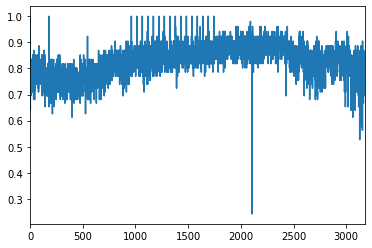

In [23]:
weekly_array_groupby.apply(similarity_func_two, axis=1).plot()

In [24]:
new_df = new_df.rename(columns={"0": "similarity_score"})

In [25]:
new_df.columns = ["sim_score"]

In [26]:
new_df.head()

,sim_score
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912


In [27]:
new_df.loc[new_df['sim_score'].idxmin()]

sim_score    0.242236
Name: 2105, dtype: float64

In [28]:
type(new_df)

pandas.core.frame.DataFrame

In [29]:
new_df.dtypes

sim_score    float64
dtype: object

In [30]:
new_df.columns

Index(['sim_score'], dtype='object')

In [31]:
set(weekly_array_groupby.loc[2105,"week_song_array"])

{"(God Must Have Spent) A Little More Time On You'N Sync",
 '...Baby One More TimeBritney Spears',
 'A Little Past Little RockLee Ann Womack',
 'Absence Of The HeartDeana Carter',
 'All The Places (I Will Kiss You)Aaron Hall',
 'Angel In DisguiseBrandy',
 'Angel Of MineMonica',
 'AngelSarah McLachlan',
 'Are You That Somebody?Aaliyah',
 'Because Of You98 Degrees',
 'Can I Get A...Jay-Z Featuring Amil (Of Major Coinz) & Ja',
 "Can't Get EnoughWillie Max Featuring Raphael Saadiq",
 'Celebrity SkinHole',
 'Changes2Pac',
 'Come And Get With MeKeith Sweat Featuring Snoop Dogg',
 'CrushJennifer Paige',
 "Don't Laugh At MeMark Wills",
 'Doo Wop (That Thing)Lauryn Hill',
 "Everything's ChangedLonestar",
 'Father Of MineEverclear',
 'Fire EscapeFastball',
 'Fly AwayLenny Kravitz',
 'For A Little WhileTim McGraw',
 'For You I WillAaron Tippin',
 'From This Moment OnShania Twain',
 'Ghetto CowboyMo Thugs Family Featuring Bone Thugs-N-Harmony',
 'HandsJewel',
 'Hard Knock Life (Ghetto Anthem)JAY-Z

In [32]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990


In [33]:
weekly_array_groupby.iloc[2105]

week_id                                               1998-12-05 00:00:00
week_song_array         [Save TonightEagle-Eye Cherry, Thank UAlanis M...
prev_week_song_array    [Doo Wop (That Thing)Lauryn Hill, I Had No Rig...
Name: 2105, dtype: object

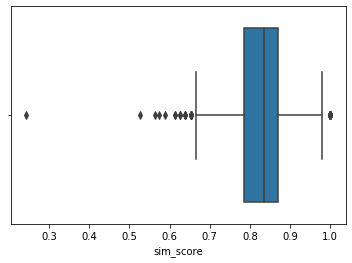

In [34]:
ax = sns.boxplot(x=new_df["sim_score"])

In [35]:
new_df.sim_score.describe()

count    3178.000000
mean        0.827942
std         0.062565
min         0.242236
25%         0.785714
50%         0.834862
75%         0.869159
max         1.000000
Name: sim_score, dtype: float64

In [36]:
lower_bound = 0.785714 - (1.5 * (0.869159-0.785714))

In [37]:
print(lower_bound)

0.6605465


In [38]:
lower_bound_df = new_df.sort_values(by=['sim_score'], ascending=True)

In [39]:
lowest_df = lower_bound_df.head(20)

In [40]:
lowest_df.head(30)

,sim_score
2105,0.242236
3128,0.526718
3154,0.562500
3150,0.574803
3141,0.587302
398,0.612903
3062,0.612903
526,0.626016
212,0.626016
3046,0.639344


In [41]:
weekly_array_groupby.iloc[398]

week_id                                               1966-03-19 00:00:00
week_song_array         [I Can't Grow Peaches On A Cherry TreeJust Us,...
prev_week_song_array    [I Want SomeoneThe Mad Lads, Barbara AnnThe Be...
Name: 398, dtype: object

In [69]:
weekly_array_groupby.head()

,week_id,week_song_array,prev_week_song_array
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P...",NaN
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev...","[Poor Little FoolRicky Nelson, PatriciaPerez P..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg...","[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo...","[How The Time FliesJerry Wallace, Down In Virg..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."


In [43]:
lowest_df.shape

(20, 1)

In [44]:
20/3178

0.0062932662051604785

In [45]:
weird_df = weekly_array_groupby.iloc[2105]

In [46]:
weird_df.head()

week_id                                               1998-12-05 00:00:00
week_song_array         [Save TonightEagle-Eye Cherry, Thank UAlanis M...
prev_week_song_array    [Doo Wop (That Thing)Lauryn Hill, I Had No Rig...
Name: 2105, dtype: object

In [47]:
weird_df.week_song_array

array(['Save TonightEagle-Eye Cherry', 'Thank UAlanis Morissette',
       'Are You That Somebody?Aaliyah', 'SlideGoo Goo Dolls',
       'Real Worldmatchbox 20', 'Doo Wop (That Thing)Lauryn Hill',
       "I'm Your AngelR. Kelly & Celine Dion",
       'From This Moment OnShania Twain', 'IrisGoo Goo Dolls',
       'Right On The MoneyAlan Jackson', "It's The Things You DoFive",
       'LullabyShawn Mullins', 'Have You Ever?Brandy',
       'JumperThird Eye Blind', 'My Favorite MistakeSheryl Crow',
       'HandsJewel', 'Inside OutEve 6',
       "I'll Never Break Your HeartBackstreet Boys",
       'Let Me Let GoFaith Hill', 'It Must Be LoveTy Herndon',
       'Husbands And WivesBrooks & Dunn', 'Fly AwayLenny Kravitz',
       'MiamiWill Smith', "It's Your SongGarth Brooks",
       "Tearin' Up My Heart'N Sync",
       "(God Must Have Spent) A Little More Time On You'N Sync",
       'AngelSarah McLachlan', 'Sweetest ThingU2', 'Changes2Pac',
       'Take Me ThereBLACKstreet & Mya Featuring Mase &

In [48]:
new_df.head(200)

,sim_score
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912
5,0.801802
6,0.754386
7,0.694915
8,0.754386
9,0.769912


In [49]:
new_df = new_df.reset_index()

In [50]:
new_df.head()

,index,sim_score
0,0,1.000000
1,1,0.666667
2,2,0.639344
3,3,0.724138
4,4,0.769912


In [73]:
weekly_groupby = billboard_df.groupby('week_id').min().reset_index().reset_index()

In [64]:
weekly_groupby.shape

(3178, 13)

In [74]:
weekly_groupby.head()

,index,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year
0,0,1958-08-02,1,(It's Been A Long Time) Pretty Baby,Big Bopper,(It's Been A Long Time) Pretty BabyGino & Gina,1,NaN,1,1,1958-08-02,8,2,1958
1,1,1958-08-09,1,A Certain Smile,Big Bopper,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-09,8,9,1958
2,2,1958-08-16,1,A Certain Smile,Betty Madigan,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-16,8,16,1958
3,3,1958-08-23,1,A Certain Smile,Betty Madigan,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-23,8,23,1958
4,4,1958-08-30,1,A Certain Smile,Andy Williams,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-30,8,30,1958


In [66]:
weekly_groupby.iloc[2105]

week_id                                             1998-12-05 00:00:00
week_position                                                         1
song                    (God Must Have Spent) A Little More Time On You
performer                                                       'N Sync
song_id               (God Must Have Spent) A Little More Time On Yo...
instance                                                              1
prev_week_position                                                    1
peak_position                                                         1
weeks_on_chart                                                        1
date                                                         1998-12-05
month                                                                12
day                                                                   5
year                                                               1998
Name: 2105, dtype: object

In [75]:
weekly_groupby = weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])

In [76]:
weekly_groupby.head()

,index,week_id,year
0,0,1958-08-02,1958
1,1,1958-08-09,1958
2,2,1958-08-16,1958
3,3,1958-08-23,1958
4,4,1958-08-30,1958


In [77]:
newest_df = new_df.set_index('index').join(weekly_groupby.set_index('index'))

In [78]:
newest_df.head()

,sim_score,week_id,year
index,,,
0,1.000000,1958-08-02,1958
1,0.666667,1958-08-09,1958
2,0.639344,1958-08-16,1958
3,0.724138,1958-08-23,1958
4,0.769912,1958-08-30,1958


In [82]:
yet_another_groupby = newest_df.groupby('year').mean()

In [83]:
yet_another_groupby.head(100)

,sim_score
year,
1958,0.775468
1959,0.788437
1960,0.781908
1961,0.751702
1962,0.753737
1963,0.756480
1964,0.748068
1965,0.756343
1966,0.751759


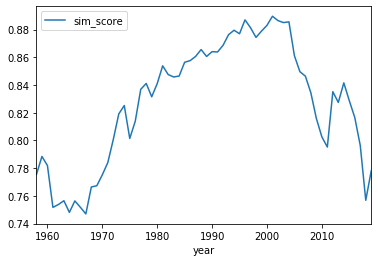

In [84]:
yet_another_groupby.plot()

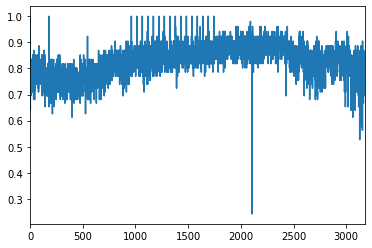

In [85]:
# note: pretty sure this is the same chart I made earlier

weekly_array_groupby.apply(similarity_func_two, axis=1).plot()